In [62]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [63]:
# Load and clean data
df = pd.read_csv('BreastCancer.csv')
df = df.dropna()
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [65]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [66]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [67]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [68]:
# Encode categorical target
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [69]:
# Select features and target
features = [col for col in df.columns if col not in ['id', 'diagnosis']]
X = df[features].apply(pd.to_numeric, errors='coerce')
y = df['diagnosis']

In [70]:
# Remove any rows with conversion errors (NaN introduced)
mask = ~X.isnull().any(axis=1)
X = X[mask]
y = y[mask]

In [71]:
# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [72]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [73]:
# Build and train model
model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
model

LogisticRegression(max_iter=1000)

In [74]:
# Predict
y_pred = model.predict(X_test)

In [75]:
# Evaluate
print('Accuracy:', accuracy_score(y_test, y_pred),'\n')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred),'\n')
print('Report:\n', classification_report(y_test, y_pred),'\n')

Accuracy: 0.9736842105263158 

Confusion Matrix:
 [[70  1]
 [ 2 41]] 

Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114
 



In [76]:
# Predict probabilities for ROC
y_proba = model.predict_proba(X_test)[:, 1]
y_proba

array([1.14654306e-01, 9.99991258e-01, 9.96935812e-01, 5.01521801e-04,
       5.98499000e-05, 1.00000000e+00, 9.99999998e-01, 9.64771580e-01,
       3.79164333e-01, 7.45367462e-04, 4.93966092e-02, 9.87635123e-01,
       6.00401864e-03, 8.54448163e-01, 1.61667308e-03, 9.99166904e-01,
       1.84326251e-03, 1.13474951e-05, 8.16917486e-07, 9.99998888e-01,
       8.39246705e-02, 9.90428726e-03, 9.99999996e-01, 7.70484841e-05,
       1.13101503e-03, 5.55051832e-04, 1.07422913e-03, 5.92627012e-03,
       2.86512159e-03, 9.99992039e-01, 4.96416799e-04, 1.46301756e-04,
       2.22100961e-03, 5.48470111e-03, 1.40207740e-04, 2.45678512e-03,
       9.41996923e-01, 2.96314904e-03, 9.99911901e-01, 4.78570967e-02,
       7.09696777e-05, 9.99604240e-01, 2.47803511e-03, 9.58715605e-04,
       2.01819497e-02, 7.38105870e-02, 4.19429778e-04, 4.98218585e-04,
       3.08627258e-02, 6.04048156e-04, 9.99881353e-01, 9.99999949e-01,
       3.10053550e-01, 1.30035735e-02, 2.57344450e-05, 9.53464745e-03,
      

ROC AUC : 0.997


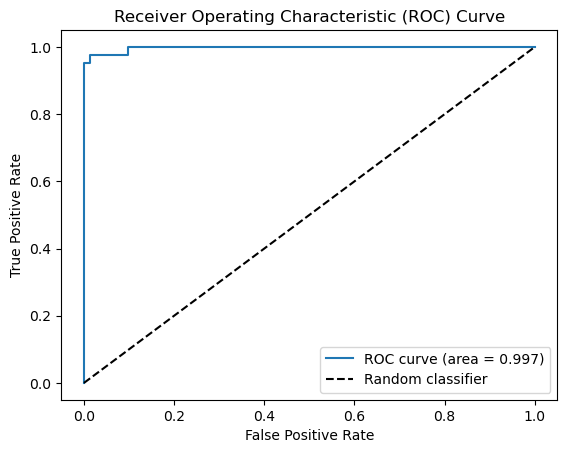

In [77]:
# ROC-AUC 
from sklearn.metrics import roc_auc_score, roc_curve

# Compute ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"ROC AUC : {roc_auc :.3f}")

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc :.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [78]:
# Tune threshold (choose threshold maximizing Youden's J statistic)
youden_index = tpr - fpr
best_thresh_idx = np.argmax(youden_index)
best_threshold = thresholds[best_thresh_idx]
print(f"Best threshold based on Youden's J statistic: {best_threshold:.3f}")

Best threshold based on Youden's J statistic: 0.491


In [79]:
# Predict classes with custom threshold
y_pred_custom = (y_proba >= best_threshold).astype(int)

# Confusion matrix and classification report
print("Confusion Matrix at tuned threshold:")
print(confusion_matrix(y_test, y_pred_custom))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_custom))

Confusion Matrix at tuned threshold:
[[70  1]
 [ 1 42]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



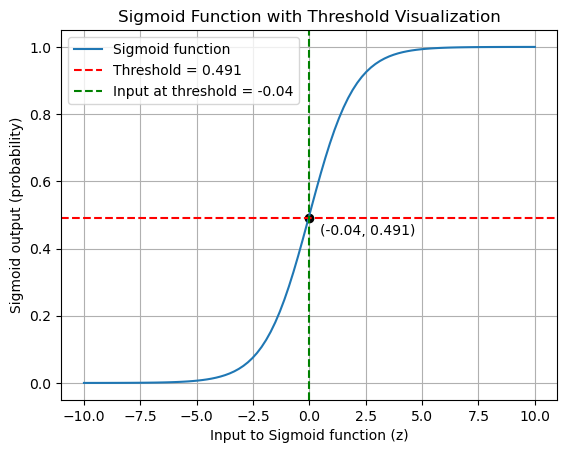

In [80]:
# Explanation of sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Example of sigmoid output for a range of values
z_values = np.linspace(-10, 10, 100)
sigmoid_values = sigmoid(z_values)

# Best threshold from Youden's J statistic
best_threshold = 0.491  # Replace with your actual value if dynamic

# Find input value for threshold (inverse sigmoid / logit)
threshold_input = np.log(best_threshold / (1 - best_threshold))

# Plot sigmoid curve
plt.plot(z_values, sigmoid_values, label='Sigmoid function')

# Horizontal line for threshold output
plt.axhline(y=best_threshold, color='red', linestyle='--', label=f'Threshold = {best_threshold:.3f}')

# Vertical line for threshold input
plt.axvline(x=threshold_input, color='green', linestyle='--', label=f'Input at threshold = {threshold_input:.2f}')

# Highlight threshold crossing point
plt.scatter(threshold_input, best_threshold, color='black')
plt.text(threshold_input + 0.5, best_threshold - 0.05, f'({threshold_input:.2f}, {best_threshold:.3f})')

# Labels and title
plt.xlabel('Input to Sigmoid function (z)')
plt.ylabel('Sigmoid output (probability)')
plt.title('Sigmoid Function with Threshold Visualization')
plt.legend()
plt.grid(True)
plt.show()